#**ANN: Stock Price Prediction + Backtesting**

C Kaligotla


## Libraries

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

## Constants and Inputs

In [1]:
# Constants
INITIAL_BALANCE = 10000.0
STOCK_SYMBOL = 'AAPL'
START_DATE = '2024-07-11'
END_DATE = '2025-07-11'
HISTORY_LENGTH = 10
TRAIN_RATIO = 0.8
EPOCHS = 10
BATCH_SIZE = 1

## Functions

In [3]:
def fetch_data():
    """Download stock data and return closing prices."""
    data = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
    return data['Close'].values.reshape(-1, 1)

def create_dataset(data):
    """Constructs time series dataset."""
    dataX, dataY = [], []
    for i in range(len(data) - HISTORY_LENGTH - 1):
        dataX.append(data[i:(i + HISTORY_LENGTH), 0])
        dataY.append(data[i + HISTORY_LENGTH, 0])
    return np.array(dataX), np.array(dataY)

def prepare_data():
    """Pre-process stock data, scale it, and split into training and test sets."""
    data = fetch_data()

    X, y = create_dataset(data)

    # Split the data into training and test datasets
    train_size = int(len(X) * TRAIN_RATIO)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and fit scalers on training data
    scaler_X = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = MinMaxScaler(feature_range=(0, 1))
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    return {
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train_scaled,
        "y_test": y_test_scaled,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y
    }


### TRAIN MODEL

In [4]:
def train_model(X_train, y_train):
    """Train a neural network model and return it."""
    model = Sequential()
    model.add(Dense(64, input_dim=HISTORY_LENGTH, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    return model


### TRADING STRATEGY

In [5]:
def execute_trading_strategy(actual_prices, predicted_prices):
    """Return account values based on a trading strategy."""
    balance = INITIAL_BALANCE
    stock_count = 0
    account_values = [INITIAL_BALANCE]

    for i in range(len(actual_prices) - 1):
        today_price = actual_prices[i][0]
        predicted_next_day_price = predicted_prices[i][0]

        # Buy if predicted price is higher, sell if lower
        if predicted_next_day_price > today_price and balance > today_price:
            balance -= today_price
            stock_count += 1
        elif predicted_next_day_price < today_price and stock_count > 0:
            balance += today_price
            stock_count -= 1

        total_value = balance + stock_count * today_price
        account_values.append(total_value)

    return account_values

### PLOTTING

In [6]:
def plot_actual_vs_predicted(actual, predicted, account_values, title):
    """Plot actual vs. predicted stock prices and account values."""
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Stock prices
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(actual, label="Actual Prices", color='tab:blue')
    ax1.plot(predicted, label="Predicted Prices", color="red", alpha=0.7)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Account values (if provided)
    if account_values:
        ax2 = ax1.twinx()
        ax2.set_ylabel('Account Value', color='tab:green')
        ax2.plot(account_values, label="Account Value", color='tab:green', linestyle='--')
        ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title(title)
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))
    plt.grid(True)
    plt.show()

## MAIN / RUN CODE

/tmp/ipython-input-3-565128725.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
Epoch 10/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


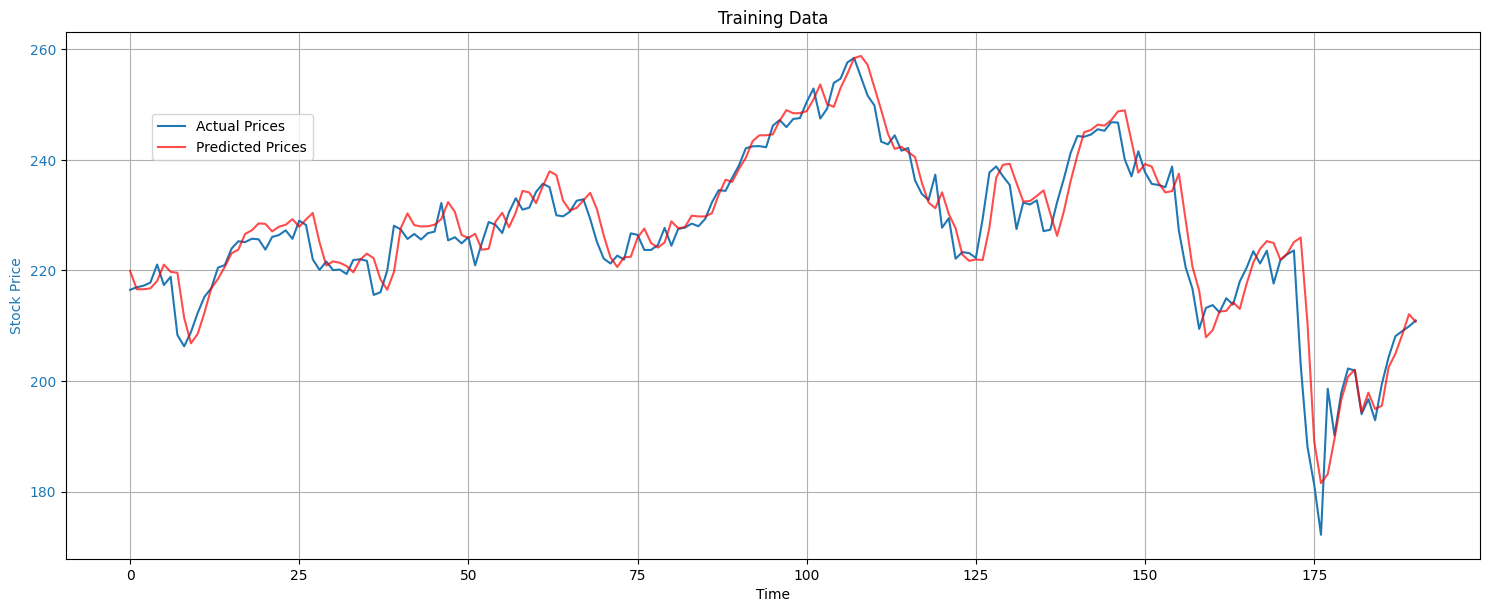

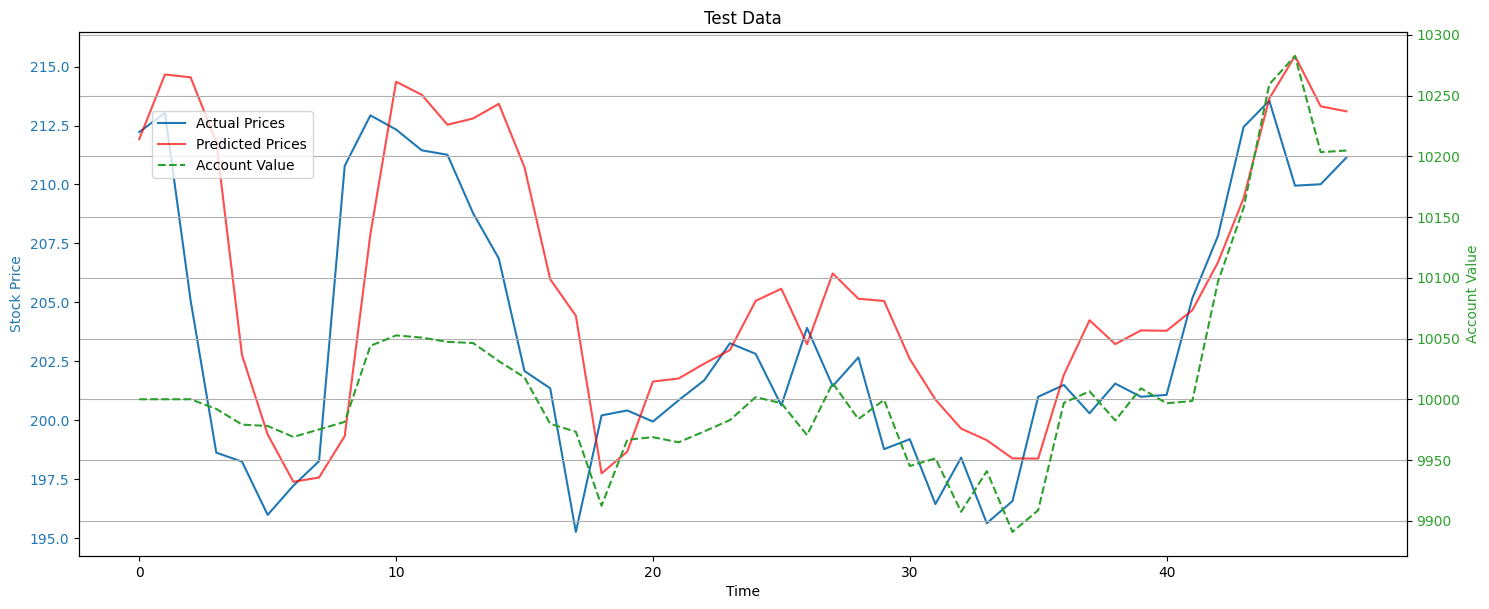

In [7]:
data = prepare_data()

model = train_model(data["X_train"], data["y_train"])

train_predict = data["scaler_y"].inverse_transform(model.predict(data["X_train"]))
test_predict = data["scaler_y"].inverse_transform(model.predict(data["X_test"]))

y_train_original = data["scaler_y"].inverse_transform(data["y_train"])
y_test_original = data["scaler_y"].inverse_transform(data["y_test"])

account_values = execute_trading_strategy(y_test_original, test_predict)

plot_actual_vs_predicted(y_train_original, train_predict, None, "Training Data")
plot_actual_vs_predicted(y_test_original, test_predict, account_values, "Test Data")